In [4]:
from IPython.display import Image

In [5]:
import os 
import pandas as pd

/tmp/ipykernel_291/2447818248.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


- DCX is a microtubule-associated protein that is widely expressed in the soma and leading processes of migrating neurons and in the axons of differentiation neurons

- SOX2 and Nestin is a neural stem cell marker 

- MAP2: neuron and reactive astrocytes
- source: https://en.wikipedia.org/wiki/Neuronal_lineage_marker#:~:text=A%20neuronal%20lineage%20marker%20is,in%20a%20cell%20of%20interest.

# MARKER DICTIONARIES

# Marker Dictionary for Whole Embryo Annotation

In [1]:
Markers_All_Celltypes = {
    "ASTRO.": ["CX3CR1","VWF","AQP4", "APOE", "SPARCL1"], # APOE and AQP4: Trevino et al., 2021

    "CAMs": ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages 

    "CGE": ["SP8", "NR2F2"], #  caudal ganglionic eminence Trevino et al., 2021

    "Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"],

    "Endothelial":["CLDN5","PECAM1", "KDR"], #"CLDN5","PECAM1": Trevino et al., 2021; KDR, CLDN5: Manno et al., 2016 
    "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
    "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],

    "EPENDYMAL":["FOXJ1"], # Trevino et al., 2021 

    "Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 

    "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],

    "Glioblast":["TNC","BCAN"], # Braun et al., 2022 

    "GluN":["NEUROD2","SATB2", "BCL11B", "SLC17A7"], # cortical glutamatergic neurons Trevino et al., 2021:BCL11B/CTIP2, SATB2, and SLC17A7/VGLUT1 

    "Granulocyte pre.": ["MPO","CLC","GATA2"],

    "HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],

    "Immature Neuron": ["INA"], # Braun et al., 2022

    "IPC": ["PPP1R17", "EOMES", "NEUROG1"], # I have combined these with markers for neuroblast from Linnarson (NHLH1) and used them for neuroblast annotation but Trevino et al., 2021 uses these as markers for intermediate progenitor cells  

    "LEC": ["PROX1","FLT4", "PDPN", 'LYVE1'], # Lymphatic endothelial cell; Jafree et al., 2021 

    "LPM":["LUM", "COL1A1"], # Leptomeningial ; Trevino et al., 2021 

    "Lymphoid": [ "CD7", "IL7R"],

    "Macrophage": ["CD4","CD14","C1QA"],

    "Mast Cell": ["TPSAB1", "KIT"],

    "MGE": ["LHX6","SST"], # medial ganglionic eminence; Trevino et al., 2021 

    "Microglia":[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 

    "MK": ["ITGA2B","ITGB3","CLEC1B"],

    "Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],

    "mGPC": ['ASCL1', 'OLIG2', 'PDGFRA', 'EGFR'], # mGPC: multipotent glial progenitor cells Trevino et al., 2021

    "Neural_Progenitor": ["NEUROG1", "TFDP2", "HMGA1", "HMGB2"], # Manno et al., 2016 

    "Neuron (broad)": ["DCX", "ELAVL3","MAP2","STMN2", "RBFOX3",'TUBB2B','STMN4', 'SNAP25','BCL11B' ],

    "NEURON_DOP.":["TH","DDC","PITX3","EN1", "TMCC3", "SLC6A3","NETO2","KCNJ6", "ALDH1A1","LMO3", "APP", "SLC18A2", "CALB1" ],

    "NEURON_EXC.":["VIP","SLC17A6","SLC17A7","LINC00507","RORB","FEZF2","THEMIS", "EMX1"], # EMX1 Excitatory lineage, Linnarson

    "NEURON_INH.": ["GAD1","GAD2","ADARB2","PVALB","SST","RELN","SNCG","LAMP5","PAX6","CCK"], # Also DLX genes; DLX2: GABAergic neurons Trevino et al., 2021 

    "NEURON_SERT.": ["TPH2", "CHGB", "SLC6A4","FEV", "GATA3", "SLC18A2", "CALB1"],

    "Neuroblast": ["NHLH1", "NRXN3", "NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4"], # Manno et al., 2016; Braun et al., 2022 

    "oRG": ["MOXD1", "HOPX"], # outer Radial Glia; Trevino et al., 2021 

    "OLIGODENDROCYTE/OPC":["MOBP","PDGFRA",'SOX10', 'NKX2-2', 'MBP',"PCDH15","APOD", "OLIG2", "OLIG1" ], # Trevino et al., 2021 :'SOX10', 'NKX2-2', 'MBP'; PDGFRA and OLIG2: OPC Tervino et al., 2022; # OLIG1: Braun et al., 2022

    "OPC":["PDGFRA","OLIG1", "OLIG2","SOX10"],

    "Pericyte":["FOXC2","PDGFRB", "NG2", "CD248", "RGS5"], # Trevino et al., 2021 ; "CD248", "RGS5": Manno et al., 2016

    "PSB": ["MEIS2", "ETV1"],#  pallial-subpallial boundary Trevino et al., 2021 

    "Radial Glia": ["HES2","NES", "SOX2","SOX10"],

    "RBC":["HEMGN"], # Trevino et al., 2021; need to combine this with erythrocytes

    "Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],

    "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],

    "vRG": ["FBXO32"], #"also CTGF" ventricular Radial Glia; Trevino et al., 2021 

    "ysDC": [ "LTBR", "CLEC10A", "CD1C"] # Trevino et al., 2021
}


# Regional markers for brain from Braun et al., 2022 
Regional_Markers= {"Subpallium":["FOXG1","NKX2-1"], "Pallium": ["FOXG1","FGF17","PAX6","EMX2"],
                   
                   "Optic Recess": ["SIX6"],"Hypoth.":["NKX2-2","NKX2-1","BARHL1"],
                   "Diencephalon":[ "FGF8","WNT2B","SHH"], "Midbrain": ["WNT2B","WNT1","SHH"],
                   "Rhombomeres":["FGF8", "EN2","NKX2-2","PAX6","OLIG3","FGF17"],
                  "Hindbrain":["SOX2","NHLH1","NRXN3","STMN2"]}


# Radial Glia: SOX9 and HES1: Trevino et al., 2021 
# Endothelial Cells: CLDN5, PECAM1 Trevino et al., 2021 
# motifs of neuronal TFs (NEUROD1/2, NEUROG1, MEF2C). Trevino et al., 2021 

# Jafree et al., 2021: https://link.springer.com/article/10.1007/s10456-021-09784-8 
# Trevino et al., 2021: https://www.sciencedirect.com/science/article/pii/S0092867421009429?via%3Dihub : 
#https://ars.els-cdn.com/content/image/1-s2.0-S0092867416313095-figs2_lrg.jpg

# CAMs from Sankowsi et al., 2022 (prepreprint)

In [ ]:
#Sankowsi et al., 2022 (prepreprint)
CAM_Markers= {'Microglia':[ 'TMEM119','P2RY12',"TREM2"],
              'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"]}

## T-Cell Markers

In [ ]:
T_Cells= {'CD8 TRM' : ['CD8A', 'RUNX3', 'CD69', 'CD44'], 
          "CD8_cytotoxic": ["CD8A", "GZMB", "CCL5"],
        "CD8" : ["CD8A", "CD8B", "SELL"],
"Treg": ["FOXP3", "CTLA4"],
"CD4_TCM-like": ["SELL", "CCR7", "S1PR1"],
"CD4_TRM": ["CCR4", "FOXP1", "CD69"],
"CD4_Th": ["RORA", "FOXP1", "CCR4"],
"CD4_Th2": ["GATA3", "PPARG", "IL13"],
"Proliferating_TRM": ["FABP5", "MKI67"],
"CD4_Th1": ["TBX21", "STAT1"],
"CD4_Th17": ["RORC", "IL17A"],
"CD4_Th22":  ["IL21", "IL22"]}

# provided by Johanna Stroble

In [7]:
#Jong-Eun Park 2022

#https://www.science.org/doi/10.1126/science.aay3224
cell_type_genes = {
    "EITP": ["PTPRC", "CD3G", "HOXA9", "HES1", "RORC", "CCR9", "PDCD1", "CD8A", "CD8B", "CD4", "CD40LG", "CRTAM", "ANXA1", "FOXP3", "DHRS3", "TRDC", "EOMES", "KLRD1", "TNFSF11"],
    "DN": ["PTPRC", "CD3G", "HOXA9", "HES1", "RORC", "CCR9", "PDCD1", "CD8A", "CD8B", "CD4"],
    "DP": ["PTPRC", "CD3G", "HOXA9", "HES1", "RORC", "CCR9", "PDCD1", "CD8A", "CD8B", "CD4", "CD40LG", "CRTAM", "ANXA1"],
    "αβT (entry)": ["PTPRC", "CD3G", "CD8A", "CD8B", "CD4", "CD40LG", "CRTAM", "ANXA1", "EOMES", "KLRD1"],
    "CD8+ T": ["PTPRC", "CD3G", "CD8A", "CD8B", "CD4", "CD40LG", "CRTAM", "ANXA1", "EOMES", "KLRD1"],
    "CD4+ T": ["PTPRC", "CD3G", "CD4", "CD40LG", "CRTAM", "ANXA1", "FOXP3", "DHRS3", "TRDC"],
    "CD4+ T Memory": ["PTPRC", "CD3G", "CD4", "CD40LG", "CRTAM", "ANXA1", "FOXP3", "DHRS3", "TRDC"],
    "T regulatory (Treg)": ["PTPRC", "CD3G", "CD4", "CD40LG", "ANXA1", "FOXP3", "DHRS3"],
    "γδ T": ["PTPRC", "CD3G", "TRDC", "EOMES"],
    "NK": ["PTPRC", "CD3G", "EOMES", "KLRD1",'NKG7', 'IFNG', 'TBX21'],
    "NKT": ["PTPRC", "CD3G", "CD8A", "CD8B", "CD4", "EOMES", "KLRD1"],
    "ILC": ["PTPRC", "CD3G", "RORC"],
    "B-pro/pre": ["CD19", "VPREB1", "IGHD", "IGHA1", "IGHG1"],
    "B-mature": ["CD19", "VPREB1", "IGHD", "IGHA1", "IGHG1"],
    "pDC": ["CLEC9A", "CLEC10A", "LAMP3"],
    "DC1": ["CLEC9A", "CLEC10A", "LAMP3"],
    "DC2": ["CLEC10A", "LAMP3", "LILRA4", "S100A9"],
    "Mono": ["C1QA", "TPSB2", "ITGA2B"],
    "Mac": ["C1QA", "TPSB2", "ITGA2B", "GYPA"],
    "Mast": ["TPSB2", "KIT"],
    "Ery": ["GYPA"],
    "Fibroblast": ["PDGFRA", "COL6A1", "FBN1", "RGS5", "CDH5", "LYVE1", "EPCAM"],
    "Endothelial": ["PDGFRA", "COL6A1", "FBN1", "RGS5", "CDH5", "LYVE1", "EPCAM"],
    "VSMC": ["ACTA2", "MYH11", "TAGLN"],
    "Innate Lymph": ["KLRB1",'ZBTB16'],
    "TEC (cortical)": ["PSMB11", "DLK2", "KRT14", "KRT1", "POU2F3"],
    "TEC (medullary)": ["AIRE", "KRT1", "KRT14", "POU2F3", "MYOD1", "NEUROG1"],
}


tcell_diff_markers = {
    "T_cell_diff_markers": ["PTCRA", "TRBC1", "CD1A", "CD5", "CD4", "CD8A", "CD8B"],
    "cell_cycle": ["TOP2A", "MKI67", "PCNA"],
    "ETP": ["ID1", "ST18", "FXYD2", "DLL1"],
    "DN": ["MSI2", "HHEX", "NDST3"],
    "DP": ["ID3", "BCL11B", "SHISA6", "ELAVL4"],
    "entry": ["ROBO4", "SATB1"],
    "SP": ["CCR7", "GZMA"]
}


## CNS Markers

In [1]:
CNS_Markers= {'Neural progenitors' : [ 'OLIG2','NKX2-2'], 
          'Glia' : ["NFIA"],
          'Oligodendrocytes': ["SOX10", "SOX9", "PDGFRA", "S100B"], 
          "CNS-Prog": ["SOX2"],
          "CNS-Neuron": ["ELAVL3"],
          "PNS-Prog": ["SOX10"],
          "PNS-Neuron": ["SIX1"],
          "Floorplate": ['PAX7', 'CDH7', 'TXLNB', 'CDHR3', 'PIFO', 'RRAD']}
# Paper 

# From Ken 

#LYMPHATIC DEVELOPMENT: https://link.springer.com/article/10.1007/s10456-021-09784-8
#
 # Lymphatic endothelial Cells LEC
markers = {
#
'Mesoderm': ['PAX3','PRRX1','ZEB2'],
'Progenitors':['CDH5','PROX1','PECAM1'],
'LEC': ["PROX1","FLT4", "PDPN", 'LYVE1','KDR'. 'TFPI'] # PROX1 has been used to identify lymphatic vessels in tissue sections of developing embryos. Jafree et al., 2021
#pan LEC markers
}
#mesoderm --> PAX3+ venous endothelial --> LEC
#precursor LEC 
    #3 - 4 - 1 = venous EC transition as KDR +ve
    #PRRX1 = MESODERM 
    #PAX3 = venous endothelial that precede LEC
    
    
    #general# from Ken
markers = {
#
'Erythrocytes': ['HBA1','HBE1'],
'Mesoderm': ['PRRX1','ZEB2'],
'Neural Crest':['SOX10','WNT1'],
'Pia': ['S100A6','NGFR'],
'Arachnoid': ['ALDH1A2','CRABP2'],   
'Dura': ['SFRP1','DKK2'],
'Perivascular': ['LAMA1','PDGFRA'],
'Vascular endothelial': ['PECAM1','SLC2A1'],
'Arachnoid Barrier': ['SLC22A6','ABCB1','SLC22A8','CLDN11','CDH1'] 
}


## Cell Cycle Markers

In [15]:

# Cell Cycle genes: from Ken 

 #check cell cycle genes and regress it
s_genes = ['MCM5','PCNA','TYMS','FEN1','MCM7','MCM4','RRM1','UNG','GINS2','MCM6','CDCA7','DTL','PRIM1',
           'UHRF1','CENPU','HELLS','RFC2','POLR1B','NASP','RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7',
           'POLD3','MSH2','ATAD2','RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2',
           'USP1','CLSPN','POLA1','CHAF1B','MRPL36','E2F8']
g2m_genes = ['HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2','NUF2','CKS1B',
             'MKI67','TMPO','CENPF','TACC3','PIMREG','SMC4','CCNB2','CKAP2L','CKAP2','AURKB','BUB1',
             'KIF11','ANP32E','TUBB4B','GTSE1','KIF20B','HJURP','CDCA3','JPT1','CDC20','TTK','CDC25C',
             'KIF2C','RANGAP1','NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA','PSRC1',
             'ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3','CBX5','CENPA']

In [ ]:
LPM_Markers={"Radial Glia": ["HES1"], "Neuroblast":["NHLH1"], 
            "Immature Neuron":["INA"],
            "Glioblast":["TNC","BCAN"],
            "OPC":["PDGFRA","OLIG1"], 
             "Neuron_Subtype_1": ["NHLH1", "INA","SLC17A6"], # Linnarson 
    
                         "Neuron_Subtype_2": ["INA", "GAD2", "SLC6A5"], # Linnarson midbrain 
    
                        "Neuron_Subtype_3": ["GAD2", "SLC6A5", "DLX2", "FOXG1","FOXG1", "TOP2A"], # Linnarson- 
    
                          "Neuron_EXCITATORY": ["EMX1"], # Linnarson- }

# markers mentioned in the fetal brain paper: https://www.biorxiv.org/content/10.1101/2022.10.24.513487v1.supplementary-material

## Manno et al., 2016

In [12]:
# Manno Markers
#NAUROD and NEUROG Genes in neuroblasts
Manno_Markers= {"Neuroblast": ["NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4"], 
    
"Neuroblast_Mediolateral1": ["FOXD2", "FOXD2-AS1", "NKX6-2", 'PCSK1',"ONECUT2"], 
    
"Neuroblast_Mediolateral5":  ["SIX3-AS1", "WNT11", "LHX5-AS1"],

"Red Nucleus":["POU4F1", "OPN3", "KMO"],
               "OMTN": ["ISL1", "FOX2A", "FOX2B","NEFL", "NEFM", "SLC18A3", "LINC00682"] #oculomotor and trochlear nucleus; 
               }


# BBB 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4292164/

# Really Useful Summary of Markers from Trevino et al., 2022 

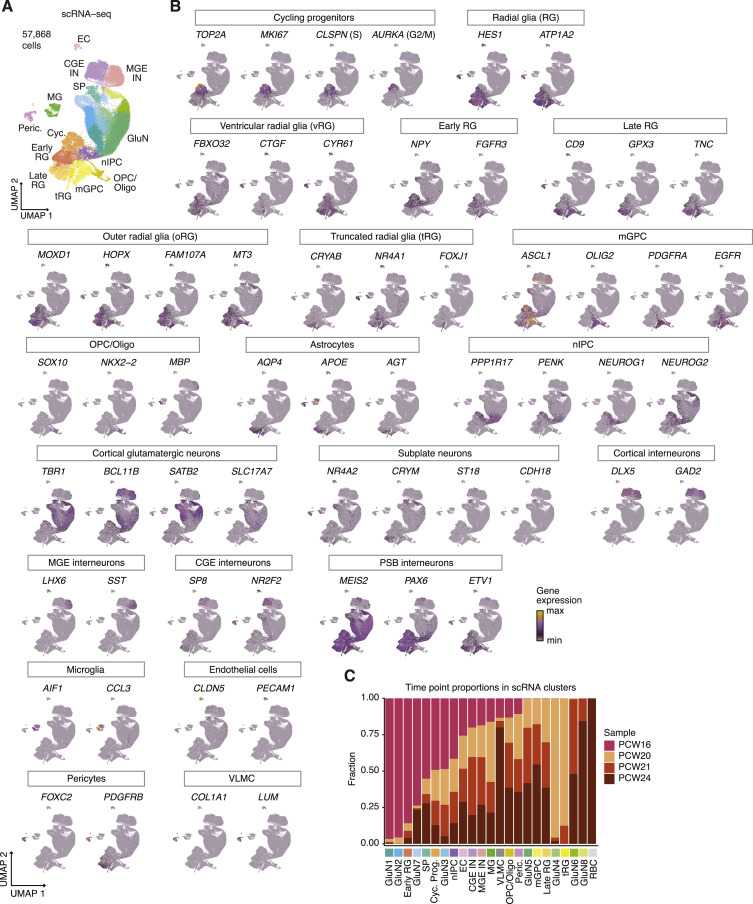

In [7]:
Image(filename='/home/jovyan/Trevino_et_al_Figure2.jpg')

# Notes from Tervino et al., 2022

- Glial maturation genes FOXJ1, AQP4, and MBP are markers for ciliated ependymal cells, astroglia, and oligodendrocytes, respectively (Barbarese et al., 1988; Jacquet et al., 2009; Zhang et al., 2016)
-  SPARCL1 is associated with mature astrocyte identity
- Loss of function mutations in NFIA have been linked to ASD and this gene is specifically upregulated in some clusters of GluN cells
- genomic deletion of NPY receptors associated with ASD; NPY in nIPCs 
- NPY is expressed in the subplate (Miller et al., 2014) and in early RG in the mid-gestation human cortex

# Markers shared by Omar 


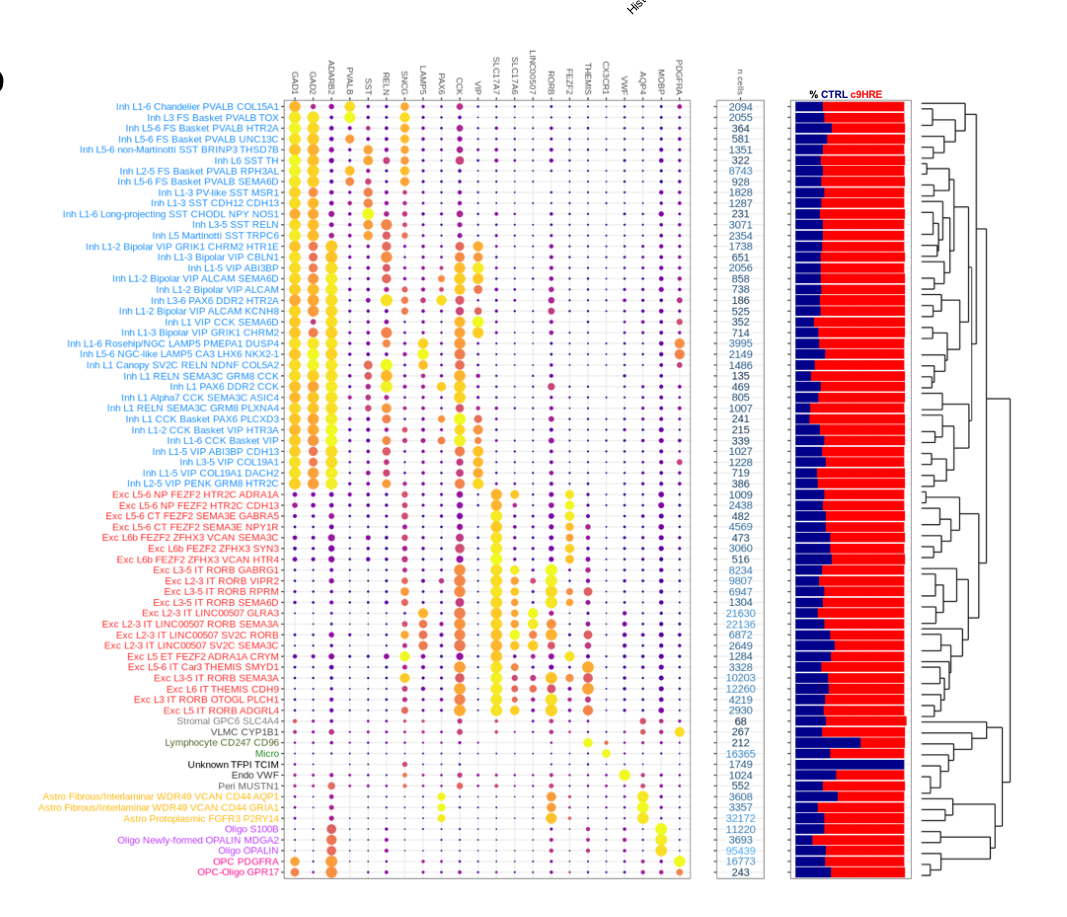

In [3]:
Image(filename='/home/jovyan/image.png')

# Notes from Omar 
- GAD1 and GAD2 are pan-inhibitory neuron markers 
- ADARB2",“PVALB”,“SST”,“RELN”,“SNCG”,“LAMP5”,“PAX6",“CCK express in subtypes of INH markers
- “NEURON_EXC.“:SLC17A6 is the best marker; others again are subtypes: they express in some, not all
- TPH2 are the best serotonergic markers 
- 

# Markers from Manno et al., 2026



- https://www.sciencedirect.com/science/article/pii/S0092867416313095?via%3Dihub

Supplementary Figure 2 

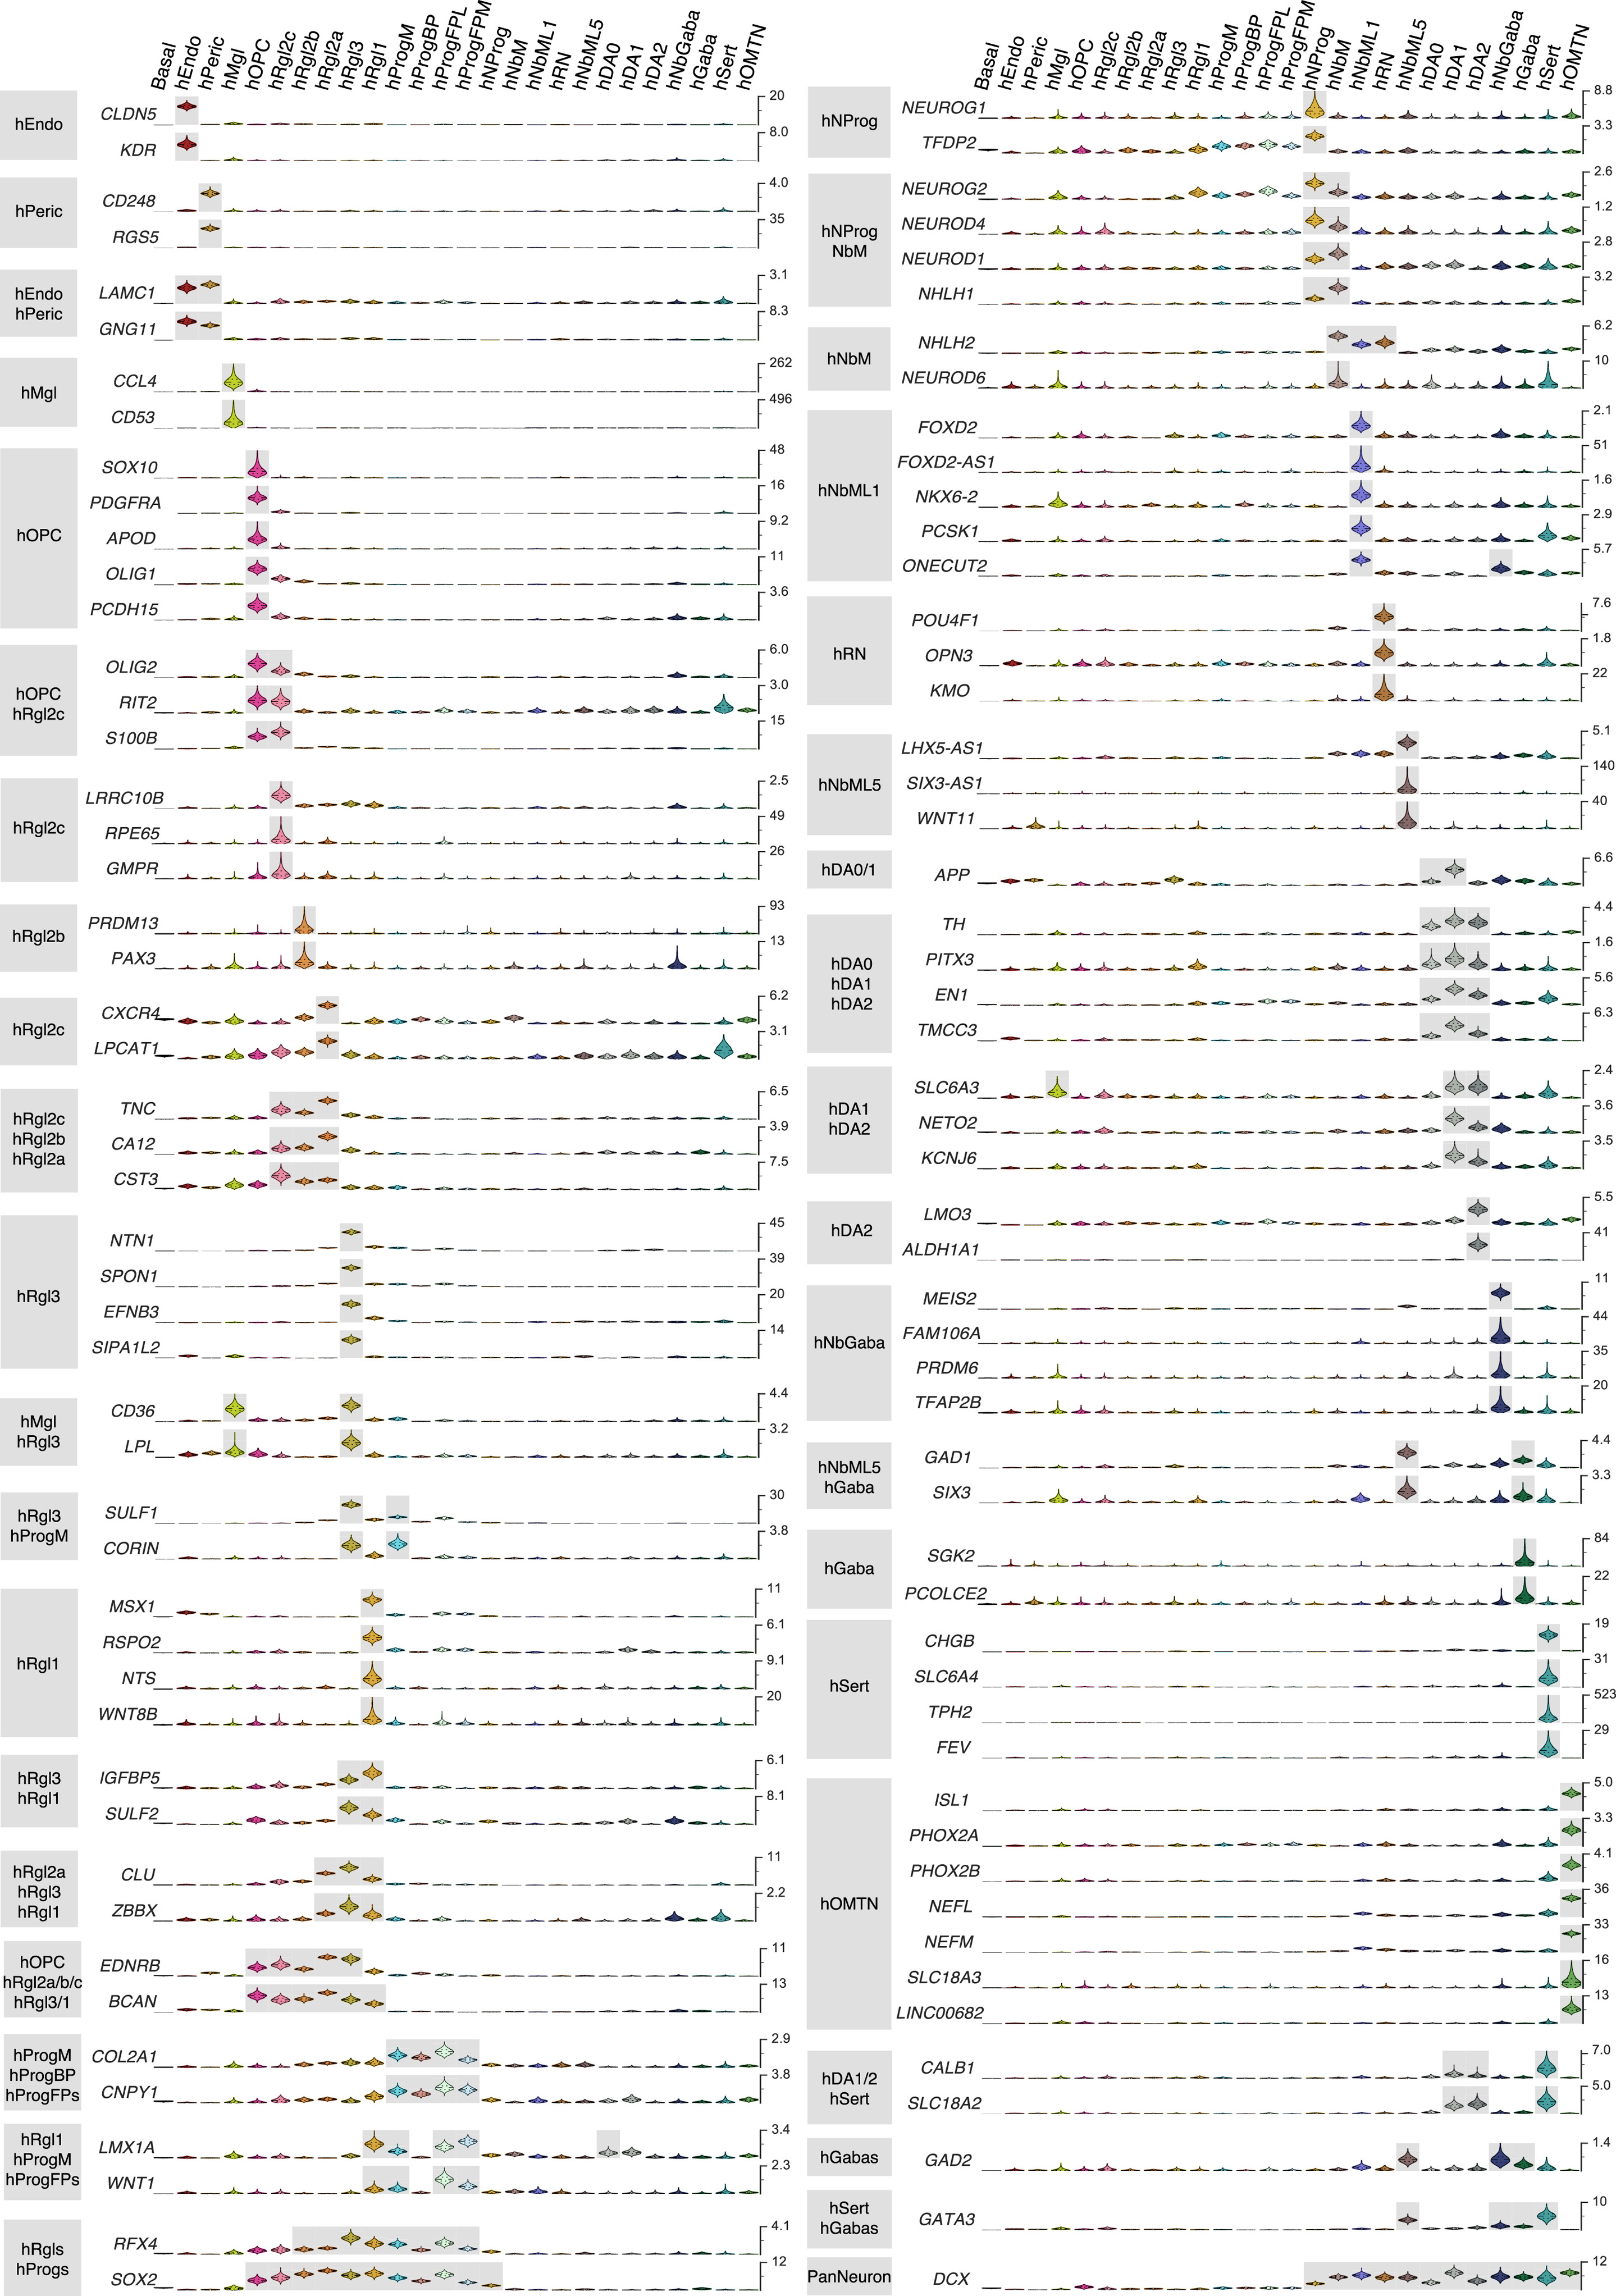

In [5]:
Image(filename='/home/jovyan/Mannoetal_Supp2.jpg')

- Cell types are named using anatomical and functional mnemonics prefixed by “m” or “h” to indicate mouse and human respectively:
- OMTN, oculomotor and trochlear nucleus; 
- Sert, serotonergic; 
- NbM, medial neuroblast; 
- NbDA, neuroblast dopaminergic;
- DA0-2, dopaminergic neurons; 
- RN, red nucleus; 
- Gaba1-2, GABAergic neurons; 
- mNbL1-2, lateral neuroblasts; 
- NbML1-5, mediolateral neuroblasts; 
- NProg, neuronal progenitor; 
- Prog, progenitor medial floorplate (FPM), 
- lateral floorplate (FPL), 
- midline (M), 
- basal plate (BP); 
- Rgl1-3, radial glia-like cells; 
- Mgl, microglia; 
- Endo, endothelial cells;
- Peric, pericytes; 
- Epend, ependymal; 
- OPC, oligodendrocyte precursor cells.

# Markers from Pan-fetal Paper *** Reliable

In [1]:
# B CELL MARKER- PANFETAL 

b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }

 # myeloid marker genes- panfetal 

myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }


# Mega- ERY markers 

MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }


# Progenitor Marker Genes 

progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }


# Stroma Annotations 

stroma_markers_panfetal = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }

# Markers from YolkSac Paper Reliable **

In [2]:
YolkSac_Markers={ "HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],
                        
                        "Lymphoid": [ "CD7", "IL7R"],
                        
                        "ysDC": [ "LTBR", "CLEC10A", "CD1C"],
                        
                        "Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],
                        
                        "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
                        
                        "Granulocyte pre.": ["MPO","CLC","GATA2"],
                        
                        "Mast Cell": ["TPSAB1", "KIT"],
                        
                        "MK": ["ITGA2B","ITGB3","CLEC1B"],
    
                        "Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
                        
                        "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
                        
                        "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
                        
                        "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
    
                        "Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
                        
                        "Mesothelium": ["KRT19","PDPN","UPK3B"],
                        
                        "Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"] }  

# Markers from Popescu and Botting et al., 2019

In [4]:
fetal_liver= { "HSC/MPP.": ["HLA-DRA", "CD34", "SPINK2"], 
              "Pre pro-B cell": ["IGLL1","CD79B"],
              "pro-B cell": ["TCL1A","IGKC","MS4A1","CD19"],
              "pre-B cell/B": ["LTB"], 
              "ILC pre.":["LTB","KLRB1","CD3E","PTPRC","CD7","IL32"],
              "Early L/TL": ["CD8A"],
              "NK": ["KLRD1","NKG7","XCL2","NCAM1"],
              "Neut-my pro.": ["MPO","PLAC8","LYZ"], 
              "pDC pre.": ["IL3RA",'CLEC9A'],# PLAC8 is not specific 
              "DC pre.": ["S100A9",'CD1C'],
              "DC1": ['CLEC9A'], 
              "DC2" : ["CD1C"], 
              "Mono pre.": ['S100A9'], 
              "Monocyte": ['CCL4','CD14'], 
              "Mono-mac": ['FCGR3A','CD4','C1QA'], 
              "Kuppfer cell" : ['VCAM1'], 
              "VCAM1+ EI mac": ['GYPA'], 
              "MEMP": ['SERPINB1'], 
              "Mast": ['TPSAB1','KIT'],
              "MK": ['PF4','ITGA2B'], 
              "Early ERY": ['GATA1','KLF1'], 
              "Mid ERY": ['ALAS2','HBA1'], 
              "Late ERY": ['BPGM'], 
              "Endo": ['ESAM'], 
              "Fibro":['ECM1'], 
              "Hepatocyte": ['APOA1']
              

}

# Markers from Jardine and Webb 2021 ** (this is the femur paper) ***

In [2]:
fbm_stroma= { 
                                           
                        "Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],
    
                        "Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
    
     "Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
     "Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
}

fbm_celltypes= {
"ERY/MK":["PTPRC",'EPCAM','GYPA','GYPB','ITGBAB','ITGB3'],
 
 "EC": ['CDH5','KDR','ANPEP'], 
    
"Gran/mast/DC": ["MSR1","KIT", 'IL3RA','IL5RA','HLA-DRA','HAVCR2','CLEC9A'], 
    
    "Monocytes": ["CD1C",'CLEC4C','CD14','CD52','CD34','CD96'], 
    "Neurtrophil": ["ITGB2",'SELL','ITGAM'], 
    
    "B lineage": ["CEACAM8",'CD99','CD79A','MME','MS4A1','TNFRSF13C'],
    "CD4T/CD56 NK": ['CD3E','KLRB1']
 
}

In [11]:
import numpy as np
df = pd.read_csv("/home/jovyan/Data_Integration/Marker_Genes/cell_type_markers_fbm 2.csv",na_values='nan')

# Replace all 'nan' strings with actual NaN values
df.replace('nan', np.nan, inplace=True)

# Initialize an empty dictionary
fbm_cell_types = {}

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Extract cell label from 'Cell labels' column
    cell_label = row['Cell labels']
    
    # Extract non-empty annotation markers from 'Key annotation marker' columns
    annotation_markers = [str(row[col]) for col in ['Key annotation marker 1', 
                                                    'Key annotation marker 2', 
                                                    'Key annotation marker 3', 
                                                    'Key annotation marker 4', 
                                                    'Key annotation marker 5'] if pd.notnull(row[col])]
    
    # Add the cell label and annotation markers to the dictionary if annotation markers are not empty
    if annotation_markers:
        fbm_cell_types[cell_label] = annotation_markers

# Print the resulting dictionary


In [ ]:
mouse chondrocyte gene from Tomo: 
    PRG4, CYT1  ACAN 

In [14]:
fbm_cell_types= {'adipo-CAR': ['CXCL12', 'LPL', 'APOE', 'GAS6'],
    'arteriolar fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
                    'basophil': ['IL3RA', 'IL5RA', 'CLC', 'HDC'], 'CD14 monocyte': ['VCAN', 'CD14', 'S100A8', 'CD300E'], 
                    'CD4 T cell': ['CD3D', 'TRAC', 'AQP3', 'CD40LG'], 'CD56 bright NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'], 
                    'CD8 T cell': ['CD3D', 'TRAC', 'CD8A', 'CD8B'], 'chondrocyte': ['LECT1', 'COL9A3', 'HAPLN1', 'COL11A1'], 
                    'CMP': ['SPINK2', 'CD34', 'CTSG', 'PRTN3'], 'DC precursor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 
                    'DC1': ['CLEC9A', 'CADM1', 'XCR1'], 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'], 
                    'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'], 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
                    'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'], 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
                    'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'], 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
                    'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'], 'eo/baso/mast precursor': ['CD34', 'SPINK2', 'CSF2RB', 'HDC'], 
                    'eosinophil': ['EPX', 'IL5RA', 'CLC', 'HDC'], 'GMP': ['CD34', 'PRSS57', 'CALR', 'AZU1'], 
                    'HSC/MPP': ['MLLT3', 'HLF', 'SPINK2', 'CD34', 'PRSS57'], 'ILC precursor': ['ZBTB16', 'RORC', 'GATA3', 'KIT'], 
                    'immature B cell': ['CD19', 'PAX5', 'IGHM', 'MS4A1'], 'immature EC': ['KDR', 'MRC1', 'PODXL', 'S100A10'], 
                    'late erythroid': ['PRDX2', 'GYPA', 'HBA1', 'BLVRB'], 'mast cell': ['KIT', 'TPSAB1', 'HPGDS', 'HDC'],
                    'mature NK': ['PRF1', 'GZMH', 'FCGR3A', 'NKG7'], 'MEMP': ['CD34', 'GATA1', 'GATA2', 'TESPA1', 'CTNNBL1'],
                    'MEP': ['CD34', 'GATA1', 'GATA2', 'KLF1', 'PLEK'], 'mid erythroid': ['KLF1', 'GATA1', 'PRDX2', 'GYPA'], 
                    'MK': ['PF4', 'MYL9', 'TREML1', 'PPBP'], 'promonocyte': ['VCAN', 'CD14', 'S100A8', 'FCN', 'CD300E'], 
                    'monocytoid macrophage': ['S100A8', 'HLA-DRA', 'SPP1', 'CD14'], 'LMPP': ['CD34', 'SPINK2', 'BCL11A', 'IL7R', 'IL2RG'],
                    'MPP myeloid': ['CD34', 'SPINK2', 'GATA2', 'MPO', 'CSF1R'], 'muscle': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 
                    'muscle stem cell': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 'myelocyte': ['LCN2', 'CAMP', 'LTF', 'STOM', 'CEACAM8'], 
                    'myeloid DC progenitor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 'myofibroblast': ['MAF', 'PDLIM4', 'COL3A1', 'DES'], 
                    'naive B cell': ['CD19', 'IGHM', 'MS4A1', 'FCER2', 'CD40'], 'MOP': ['PRTN3', 'S100A8', 'LYZ', 'IRF8'], 
                    'neutrophil': ['ITGAM', 'MMP9', 'PGLYRP1', 'ORM1'], 'NK T cell': ['CD8A', 'KLRB1', 'TRAC', 'NKG7'],
                    'NK progenitor': ['CD34', 'PRSS57', 'SOX4', 'TOX', 'NKG7'], 'osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 
                    'osteoblast precursor': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 'osteochondral precursor': ['ENG', 'NT5E', 'THY1', 'CD44'], 
                    'osteoclast': ['ACP5', 'CTSK', 'MMP9'], 'pDC': ['GZMB', 'JCHAIN', 'SERPINF1'], 'pDC progenitor': ['CD34', 'IRF8', 'JCHAIN', 'GZMB'],
                    'pre B progenitor': ['CD19', 'PAX5', 'IGHM', 'IGHD'], 'pre pro B progenitor': ['IL7R', 'CD19', 'MME', 'RAG1', 'EBF1'], 
                    'pro B progenitor': ['DNTT', 'MME', 'VPREB1', 'RAG1'], 'proliferating EC': ['KDR', 'RAMP2', 'PODXL', 'MKI67'], 
                    'promyelocyte': ['MPO', 'ELANE', 'CTSG', 'PRTN3', 'AZU1'], 'schwann cells': ['MAG', 'APLP1', 'CNP', 'CLDN11'], 
                    'sinusoidal EC': ['STAB1', 'MRC1', 'LYVE1', 'ENG', 'TSPAN7'], 'stromal macrophage': ['CD14', 'APOE', 'F13A1', 'C1QC', 'SPP1'], 
                    'tDC': ['AXL', 'SIGLEC6', 'CD22'], 
                    'tip EC': ['KDR', 'LYVE1', 'ENG', 'DLL4'], 'Treg': ['CD3D', 'TRAC', 'TIGIT', 'FOXP3']}

# Markers from Celltypist Database

- ELP: early lymphoid progenitors which originate from hematopoietic stem cells of the bone marrow and migrate to the thymus

- early lymphoid/T lymphoid: lymphocytes with lymphocyte potential in the fetal liver before T cells emerged from the thymus

- CMP: Common myeloid progenitors:highly proliferative common myeloid progenitors which later give rise to granulocyte-monocyte progenitors and megakaryocyte-erythroid progenitors

- GMP: hematopoietic granulocyte-monocyte progenitors that are committed to the granulocyte and monocyte lineage cells

- ILC PRECURSOR: innate lymphoid cell precursors which give rise to innate lymphoid cells and lack the characteristics of their mature progenies

- MEMP: shared progenitors which are derived from common myeloid progenitors and will differentiate into megakaryocytes, erythroid cells or mast cells

- NK: granular lymphocytes that play protective roles against both infectious pathogens and cancer using antibody-dependent cell-mediated cytotoxicity

- CD16 + NK: CD16+ granular lymphocytes that play protective roles against both infectious pathogens and cancer using antibody-dependent cell-mediated cytotoxicity

- TRANSITIONAL NK: immature natural killer cells which originate from natural killer cell precursors and are committed to mature natural killer cells

- ILC: specialised innate immune cells from the lymphoid lineage but without antigen-specific T-cell receptors on the surface

- ILC1: innate lymphoid cell subpopulation I that is non-cytotoxic and has overlapping phenotypes and functions with natural killer cells

- ILC2: innate lymphoid cell subpopulation II that promotes type 2 inflammation and is involved in immune response against large extracellular pathogens

- ILC3: innate lymphoid cell subpopulation III that is required for host defense against specific extracellular bacteria and fungi

- MNP: mononuclear phagocytes including dendritic cells, monocytes and macrophages that have in common the property of phagocytosis

In [5]:
celltypist_lymphoid= {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
    
    "ILC_precursor": ["LST1","HPN","SCN1B"],
    "NK": ['GNLY','NKG7','XCL2'],
    "CD16+ NK": ["FCGR3A","GNLY","NKG7"],
     "CD16- NK": ["CD160","GNLY","NKG7"],
    'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
    "ILC": ["S100A13",'TLE1','AREG'],
    'ILC1': ['CXCR3','CD3D','IKZF3'],
    'ILC2': ['GATA3','KLRG1','HPGDS'], 
    'ILC3': ['IL4I1','RORC','KIT'],

    


}


celltypist_progenitors=  {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019

    "HSC": ["CD34","SPINK2","CRHBP"],
    "CMP": ["MPO","CTSG","FLT3"],
    "GMP": ["ELANE","MPO","PRTN3"],
    "MEMP": ["GATA1","GATA2","ITGA2B","FCER1A"], # FCER1A, GATA1 and GATA2 liver 
    "Neut_myeloid_pro.":["SERPINB1","MPO","LYZ"]}

celltypist_immune= {
    
    "MNP": ["HLA_DPA1","HLA-DQA1",'FGL2'],
    "Mast": ["TPSAB1","TPSB2",'CPA3']

}



cell_typist_B={"B": ["CD79A","MS4A1","CD19"],
               "transitional": ["CD24","MYO1C","MS4A1"],
              "large_pre_B":["CD24","MME","MKI67"],
              "pre_pro_B":["ZCCHC7","IL7R","RAG1"],
               "pro-b":["MME","DNTT",'IGLL1'],
                "small_pre_B":["IGLL5",'CD24',"MME"],
               "cycling_B":['CD19',"TOP2A","MKI67"]
              }

# Markers from Whole Embryo

In [9]:
 #Read the CSV file into a DataFrame
file_path = '/lustre/scratch126/cellgen/team298/sm54/Data_Integration/Marker_Genes/Supplementary Tables - Table_5_scRNA-seq_annotation_hierarchy.csv'  # Replace 'your_file.csv' with the actual file path
df = pd.read_csv(file_path)

# Initialize an empty dictionary
whole_embryo_harmonised_annotations_sw = {}

# Iterate through rows and populate the dictionary
for index, row in df.iterrows():
    cell_types = [cell_type.strip() for cell_type in row['cell_type_lvl4'].split(',')]
    marker_genes = [gene.strip() for gene in row['marker_gene_list'].split(',')]
    
    for cell_type in cell_types:
        if cell_type not in whole_embryo_harmonised_annotations_sw:
            whole_embryo_harmonised_annotations_sw[cell_type] = []
        whole_embryo_harmonised_annotations_sw[cell_type].extend(marker_genes)

In [21]:
whole_embryo_harmonised_annotations_sw.get('sclerotome')

['PAX1', 'PAX9', 'CNMD']

In [11]:
all_whole_embryo= {'primordial germ cell': ['NANOG', 'NANOS3', 'POU5F1', 'DPPA3', 'DND1'],
 'sclerotome': ['PAX1', 'PAX9', 'CNMD'],
 'lateral plate mesoderm': ['PRRX1',
  'PRRX2',
  'LHX9',
  'MSX1',
  'MSX2',
  'TBX2',
  'TBX3',
  'PITX1'],
 'radial glia': ['SOX2', 'NES', 'MKI67'],
 'radial glia cortical': ['SOX2', 'NES', 'MKI67', 'EMX2', 'PAX6', 'FOXG1'],
 'radial glia diencephalon': ['SOX2', 'NES', 'MKI67', 'PAX6', 'WNT2B'],
 'radial glia midbrain': ['SOX2', 'NES', 'MKI67', 'EN1', 'OTX2'],
 'radial glia mid-hindbrain boundary': ['SOX2',
  'NES',
  'MKI67',
  'FGF18',
  'SPRY1',
  'SPRY2'],
 'radial glia hindbrain': ['SOX2', 'NES', 'MKI67', 'PAX6'],
 'glial progenitor': ['TNC', 'BCAN'],
 'NEUROG1+ neural progenitor': ['NEUROG1'],
 'NEUROG1+ neural progenitor midbrain': ['NEUROG1', 'OTX2'],
 'intermediate neural progenitor': ['PPP1R17', 'EOMES'],
 'intermediate neural progenitor cortical': ['PPP1R17',
  'EOMES',
  'EMX2',
  'FOXG1'],
 'pA1 neural progenitor': ['OLIG3', 'ATOH1'],
 'pA2 neural progenitor': ['OLIG3', 'NEUROG1'],
 'pA3-4 neural progenitor': ['OLIG3', 'PTF1A'],
 'DA1 neuron': ['LHX2', 'LHX9'],
 'DA3 neuron': ['LBX1', 'TLX3', 'LMX1B'],
 'DB1 neuron': ['LHX1', 'LHX5', 'PAX2', 'LBX1'],
 'DL1 neuron': ['BARHL1', 'BARHL2'],
 'DL2 neuron': ['TLX3'],
 'DL3 neuron': ['OTP'],
 'DL5 neuron': ['LMX1B', 'ASCL1'],
 'DL6 neuron': ['DMRT3'],
 'p2 neural progenitor': ['FOXN4', 'NKX6-1', 'VSX1'],
 'pMNv neural progenitor': ['NKX2-2', 'NKX6-1'],
 'V0 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EVX1', 'EVX2'],
 'V1 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EN1'],
 'V2A-B interneuron': ['LHX3', 'VSX2', 'SOX14', 'GATA2', 'GATA3'],
 'V3 interneuron': ['SIM1', 'NKX2-2'],
 'motor neuron': ['MNX1', 'ISL1'],
 'inhibitory neuron cortical': ['GAD1',
  'GAD2',
  'ADARB2',
  'RELN',
  'SNCG',
  'LAMP5',
  'FOXG1'],
 'inhibitory neuron midbrain': ['SGK2', 'PCOLCE2', 'OTX2'],
 'inhibitory neuron hindbrain': ['GAD1',
  'GAD2',
  'ADARB2',
  'RELN',
  'SNCG',
  'LAMP5',
  'GBX2'],
 'excitatory neuron': ['SLC17A6',
  'SLC17A7',
  'LINC00507',
  'FEZF2',
  'THEMIS',
  'EMX1'],
 'excitatory neuron cortical': ['SATB2',
  'BCL11B',
  'SLC17A7',
  'TBR1',
  'EMX2',
  'FOXG1'],
 'excitatory neuron midbrain': ['SLC17A6',
  'SLC17A7',
  'LINC00507',
  'FEZF2',
  'THEMIS',
  'EMX1',
  'OTX2'],
 'excitatory neuron hindbrain': ['SLC17A6',
  'SLC17A7',
  'LINC00507',
  'FEZF2',
  'THEMIS',
  'EMX1',
  'PAX6'],
 'ELAVL4+ neuron': ['ELAVL4', 'INA', 'TUBB3'],
 'ELAVL4+ neuron cortical': ['ELAVL4', 'INA', 'TUBB3', 'FOXG1'],
 'ELAVL4+ neuron midbrain': ['ELAVL4', 'INA', 'TUBB3', 'OTX2'],
 'dopaminergic neuron': ['TH', 'DDC', 'SLC6A3', 'KCNJ6', 'SLC18A2', 'CALB1'],
 'dopaminergic neuron midbrain': ['TH',
  'DDC',
  'SLC6A3',
  'KCNJ6',
  'SLC18A2',
  'CALB1',
  'OTX2'],
 'dopaminergic neuron hindbrain': ['TH',
  'DDC',
  'SLC6A3',
  'KCNJ6',
  'SLC18A2',
  'CALB1',
  'PAX6'],
 'serotenergic neuron': ['TPH2', 'SLC6A4', 'FEV', 'GATA3', 'CHGB'],
 'sympathetic neuron': ['PHOX2B', 'DBH', 'TLX2', 'CHGA'],
 'enteric neuron': ['VIP'],
 'proprioceptive neuron': ['HMX1', 'HMX2'],
 'floor plate': ['SHH', 'FOXA2'],
 'roof plate': ['LMX1A', 'WNT1', 'GDF7', 'WNT3A'],
 'ependymal glia': ['FOXJ1'],
 'ependymal glia midbrain': ['FOXJ1', 'OTX2'],
 'oligodendrocyte precursor': ['SOX2', 'EGFR', 'OLIG1', 'OLIG2', 'DLL3'],
 'oligodendrocyte precursor cortical': ['SOX2',
  'EGFR',
  'OLIG1',
  'OLIG2',
  'DLL3',
  'FOXG1',
  'EMX2',
  'PAX6'],
 'oligodendrocyte precursor midbrain': ['SOX2',
  'EGFR',
  'OLIG1',
  'OLIG2',
  'DLL3',
  'OTX2'],
 'oligodendrocyte precursor hindbrain': ['SOX2',
  'EGFR',
  'OLIG1',
  'OLIG2',
  'DLL3',
  'PAX6'],
 'schwann cell precursor': ['MPZ', 'SOX10', 'PLP1', 'FOXD3'],
 'retinal pigment epithelium': ['MITF',
  'PAX2',
  'DCT',
  'CCK',
  'ALDH1A3',
  'TRPM3',
  'POMC',
  'HSD17B2'],
 'retinal neural progenitors': ['VSX2',
  'OPTC',
  'CLDN1',
  'RAX',
  'SIX3',
  'PAX6',
  'DAPL1',
  'CCL2',
  'ALDH1A1',
  'SIX6'],
 'auditory vesicle neural progenitors': ['OC90',
  'BRICD5',
  'S100A1',
  'PLPP2',
  'WFDC2',
  'LMX1A',
  'GATA3',
  'DLX5'],
 'melanocyte': ['CRYAB', 'TYRP1', 'PMEL', 'TYR', 'DCT', 'MLANA', 'MITF'],
 'periderm': ['UPK2',
  'GABRP',
  'KRT18',
  'KRT8',
  'ELF3',
  'IL36RN',
  'MUC16',
  'VTCN1'],
 'keratinocyte': ['KRT5', 'KRT15', 'KRT18', 'KRT19', 'RASSF6', 'RASSF7'],
 'lower genital keratinocyte': ['TP63', 'FOXA1'],
 'dermal fibroblast precursor': ['EN1', 'SIM1', 'PAX3', 'OSR1', 'TWIST2'],
 'dermal fibroblast': ['WNT2',
  'HOXC4',
  'HOXC5',
  'FRZB',
  'SLC6A13',
  'SLC1A3',
  'SLC6A1',
  'EPHA7',
  'CYP1B1'],
 'atrial cardiomyocyte': ['NPPA', 'MYL7', 'MYL4'],
 'ventricular cardiomyocyte': ['MYH7', 'MYL2', 'FHL2'],
 'atrioventricular pacemaker': ['MSX2', 'TBX3', 'CACNA1D'],
 'mesothelial epicardium': ['ALDH1A2', 'LRP2', 'ITLN1', 'TBX18'],
 'epicardial derived cell': ['TBX18'],
 'vascular smooth muscle': ['TAGLN', 'MYL9', 'FOXC2', 'PRDM6', 'TBX1'],
 'early endothelium': ['S100A10', 'PODXL', 'ITM2A', 'SLC2A1'],
 'early lymphatic endothelium': ['TFF3', 'NTS', 'PROX1'],
 'arterial endothelium': ['ALDH1A1',
  'IL33',
  'GJA5',
  'DKK2',
  'UNC5B',
  'DLL4',
  'PRND',
  'GPIHBP1',
  'CXCR4'],
 'haeamatopoietic stem and progenitor cell': ['MLLT3', 'HOPX', 'SPINK2'],
 'myeloid progenitor': ['CD34', 'PRSS57', 'AZU1', 'CTSG', 'PRTN3'],
 'monocyte': ['HLA-DRA', 'LYZ', 'FCGR3A'],
 'monocyte-DC': ['HLA-DRA',
  'LYZ',
  'FCGR3A',
  'CLEC9A',
  'BTLA',
  'BATF3',
  'CLEC10A',
  'CD1C',
  'CSF3R',
  'S100A12'],
 'macrophage': ['CD4', 'CD14', 'C1QA'],
 'microglia': ['TREM2', 'CX3CR1', 'P2RY12'],
 'DC2': ['CLEC10A', 'CD1C'],
 'DC3': ['CSF3R', 'S100A12'],
 'B cell progenitor': ['SPINK2',
  'IL7R',
  'DNTT',
  'VPREB1',
  'RAG1',
  'CD19',
  'IGHM',
  'IGHD',
  'MS4A1'],
 'megakaryocyte erythroid mast progenitor': ['GATA1',
  'GATA2',
  'TESPA1',
  'CTNNBL1',
  'CD34'],
 'mast cell': ['TPSAB1', 'KIT'],
 'megakaryocyte': ['PF4', 'MYL9', 'TREML1', 'PPBP'],
 'early erythroid': ['HBE1', 'HBZ'],
 'mid-late erythroid': ['GATA1', 'KLF1', 'GYPA', 'HBA1'],
 'dental pulp cell': ['SOX9', 'SCUBE1'],
 'odontoblast precursor': ['DKK1', 'RUNX2', 'PDPN', 'NOTUM', 'ETV4', 'FRMD5'],
 'intevertebral disc': ['NDUFA4L2'],
 'meningeal fibroblast': ['ALDH1A2', 'CLDN11', 'ACTG2'],
 'limb mesenchyme': ['ALX4', 'IRX3', 'HIC1', 'GSC', 'OBSCN'],
 'limb fibroblast': ['TBX5',
  'TBX15',
  'TBX18',
  'TBX3',
  'PDGFRA',
  'HIC1',
  'XX2',
  'MEOX2'],
 'limb chondrocyte precursor': ['SOX6',
  'SOX9',
  'SHOX',
  'SHOX2',
  'TBX4',
  'PITX1',
  'HOXA10',
  'CNMD'],
 'limb digit chondrocyte precursor': ['TBX5',
  'HOXA13',
  'HOXD13',
  'SOX9',
  'HAND2',
  'SALL1'],
 'chondrocyte precursor': ['GDF5', 'PRDM16'],
 'osteoblast precursor': ['RUNX2', 'DLX5'],
 'myofibroblast': ['PDGFRA', 'OBSCN', 'NEAT1'],
 'fibroblast': ['GDF10', 'PDGFRA', 'UNC5C', 'MECOM'],
 'skeletal muscle progenitor': ['PAX3',
  'MYOD1',
  'TNNT1',
  'ACTC1',
  'PAX7',
  'MSC'],
 'skeletal myoblast': ['PAX7', 'MYF5', 'TTN'],
 'hypaxial skeletal myoblast': ['PAX7', 'LBX1', 'MYOD1'],
 'skeletal myocyte': ['MYOG', 'MYH3'],
 'perimysium': ['HLX'],
 'tendon progenitor': ['OSR2', 'MEOX2', 'SCX'],
 'intermediate mesoderm gonadomesenephros': ['OSR1', 'WT1', 'PAX8', 'LBX2'],
 'coelomic gonadal epithelium': ['UPK3B', 'KRT19', 'LRRN4', 'GATA6'],
 'wolffian duct': ['CALB1', 'WNT9B'],
 'kidney podocyte': ['NPHS1', 'NPHS2', 'WT1'],
 'renal fibroblast': ['CDH9', 'GATA5'],
 'hepatic stellate cell': ['HGF'],
 'hepatocyte': ['APOA1', 'AFP'],
 'pancreatic progenitor': ['PDX1'],
 'pharyngeal arch 1 neural crest': ['DLX1',
  'DLX2',
  'DLX3',
  'DLX4',
  'DLX5',
  'DLX6'],
 'pharyngeal arch 2 neural crest': ['DLX1',
  'DLX2',
  'DLX3',
  'DLX4',
  'DLX5',
  'DLX6',
  'HOXA2',
  'HOXB2'],
 'pharyngeal epithelium': ['ISL1', 'NKX2-3', 'NKX2-5', 'FOXP2'],
 'oesophageal epithelium': ['SOX2', 'KLF5', 'DCDC2', 'EPS8L2', 'FOXA1'],
 'stomach epithelium': ['KLF5',
  'ONECUT2',
  'FOXA1',
  'AGR3',
  'FXYD3',
  'KLF5',
  'DCDC2',
  'STARD10',
  'FOXA1'],
 'intestinal epithelium': ['CDX2'],
 'lung epithelium': ['NKX2-1', 'TPPP3', 'LRRC36', 'CPM', 'UGT2B7']}

In [12]:
we_hsc_only=  {
'haeamatopoietic stem and progenitor cell': ['MLLT3', 'HOPX', 'SPINK2'],
 'myeloid progenitor': ['CD34', 'PRSS57', 'AZU1', 'CTSG', 'PRTN3'],
 'monocyte': ['HLA-DRA', 'LYZ', 'FCGR3A'],
 'monocyte-DC': ['HLA-DRA',
  'LYZ',
  'FCGR3A',
  'CLEC9A',
  'BTLA',
  'BATF3',
  'CLEC10A',
  'CD1C',
  'CSF3R',
  'S100A12'],
 'macrophage': ['CD4', 'CD14', 'C1QA'],
 'microglia': ['TREM2', 'CX3CR1', 'P2RY12'],
 'DC2': ['CLEC10A', 'CD1C'],
 'DC3': ['CSF3R', 'S100A12'],
 'B cell progenitor': ['SPINK2',
  'IL7R',
  'DNTT',
  'VPREB1',
  'RAG1',
  'CD19',
  'IGHM',
  'IGHD',
  'MS4A1'],
 'megakaryocyte erythroid mast progenitor': ['GATA1',
  'GATA2',
  'TESPA1',
  'CTNNBL1',
  'CD34'],
 'mast cell': ['TPSAB1', 'KIT'],
 'megakaryocyte': ['PF4', 'MYL9', 'TREML1', 'PPBP'],
 'early erythroid': ['HBE1', 'HBZ'],
 'mid-late erythroid': ['GATA1', 'KLF1', 'GYPA', 'HBA1'],}

# Markers from Calvanese et al., 2022

In [2]:
HSC_scorecared={
    "HSC_Signature": ["RUNX1", "MLLT3","HOXA9","MECOM","HLF","SPINK2"],
    "HSC_Enriched": ["MYB","GFI1","STAT5A",'ZBTB16','HOPX','GATA2',
                     'GBP4','ITGA2B','KCNK17','SVOPL','C2orf88','SELP',
                     'CD82','ITGA4','GP9','TMEM163','RAB27B','SMIM24',
                     'GMPR','PDLIM1','ALDH1A1','NRGN','CCDC173','CXCL3',
                     'CYTL1','PRSS57','ANGPT1'],
    'HSC_shared_Endo': ["CD34","PECAM1",'CDH5','ECSCR.1','CALCRL',
                       'PROCR','ESAM','TIE1','EMCN']
}

HSC_maturation= {
    "Immature": ['CDH5', 'MEIS2', 'IGFBP2', 'HOXB9'],
     "Mature": ['PROM1', 'HLA-DRA', 'HEMGN', 'MSI2'] 
}


In [ ]:
 immaturity (CDH5, MEIS2, IGFBP2, HOXB9) and maturity (PROM1, HLA-DRA, HEMGN, MSI2) 

# Markers from Antony

In [1]:
ERY_Antony={'ProE/BasoE' : ['FTH1','TPT1','EEF1A1',],
    
'Early-PolyE' : ['ACTB','CFL1',],
    
'Late-PolyE' : ['ARL6IP1','SKP1','TOP1','GYPA','HBD','GYPB'],
    
'Early-OrthoE' : ['SLC25A37','ARL4A','HBD','BNIP3L',
'TMCC2','XPO7','BSG','IFIT1B','ALAS2','LPIN2',],
    
'Late_OrthoE' : ['HBA2','HBA1','UBB','MKRN1'], 

   
'Late_OrthoE' : ['HBA2','HBA1','UBB','MKRN1'], 
    
    
        'Mac_signature' : ['C1QA','C1QB','C1QC','CD14','CD68'],

'ERY_early_fl' : ['GATA1','KLF1'],
'ERY_mid_fl' : ['ALAS2','HBA1'],
'ERY_late_fl' : ['BPGM','RNF10','TRIM58','MAP1LC3B',],
    
'er_master_tfs' : ['GATA1','TAL1','KLF1','LDB1','LMO2','TCF3','GATA2',],

'erythropoesis_regulation' : ['FOXO3','MYB','KAT2A'],
    
'Embryonic_erythroid' : ['HBE1','HBZ','GYPA'],     
    
'ery_loss_over_time' : [
'KIT','RUNX1','NFE2L1','ENG','MAPK14',
'CD47','CD58','SPN','CD36','TFRC',
'KLF1','AHSP','HBM','GYPA','TERF2IP','GYPC','GYPB','SPTA1',],
 
'ery_increase_over_time' : ['HBB','HBA1',],
    
'adult_ery' : ['IRF2','IRF6'],
    
'Canonical haemoglobins' : ['HBA1','HBA2','HBB','HBG1','HBG2'], 
     # genome alignment problem within brain for HBG1/2

'Epigenetic and chromatin-associated factors' : ['HDAC1','HDAC2','HDAC3', 'ASXL1',
'TET1','TET2','CASP3','SIRT1',],
'EPOR' : ['EPOR']}
 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Markers from Wu et al.,2024

 LT-HSC, long-term HSC; ST-HSC, short-term HSC; MPP, multipotent pregenitor; MkP, megakaryocyte progenitor; Pre Meg-E, pre-megakaryocyte erythroid progenitor; Pre CFU-E, pre-erythrocyte colony-forming unit; CFU-E, erythrocyte colony-forming unit; Pre-GM, pre-granulocyte–monocyte progenitor; MDP, monocyte dendritic cell progenitor; GMP, granulocyte–monocyte progenitor; GP, granulocyte progenitor; cMoP, common monocyte progenitor; MP, monocyte progenitors.
 
  CMP, common myeloid progenitor

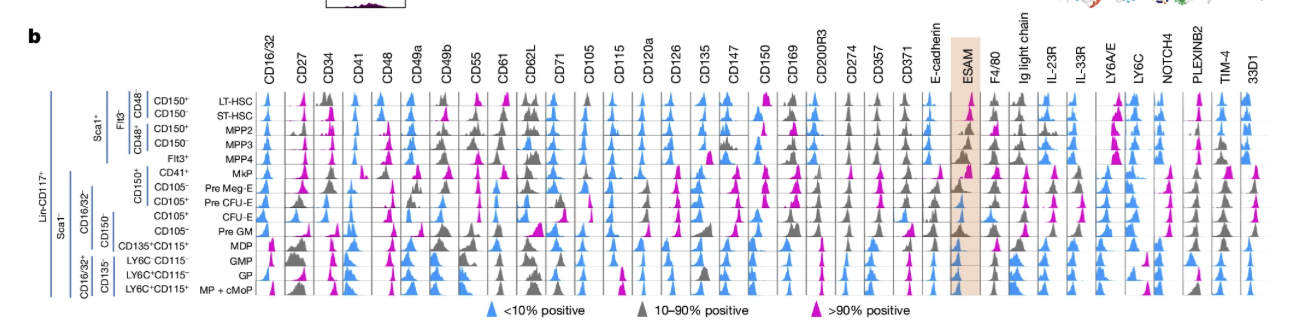

In [6]:
Image(filename='/lustre/scratch126/cellgen/team298/sm54/Data_Integration/Marker_Genes/Figures/Wuetal2024Figure1b.png')

## Figure 1 Markers:

MoP:  monocyte progenitor;
CD117 is KIT
CD115 is CSF1R   
CD127 is IL7R
B220 is PTPRC 
CD150 is SLAMF1
CD71 is TFRC
TER119 is CD235a in humans https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10401433/
CD235a is GYPA 
CD41 is ITGA2B
CD43 is SPN 
CD16 is FCGR3A
CD32 is FCGR2A

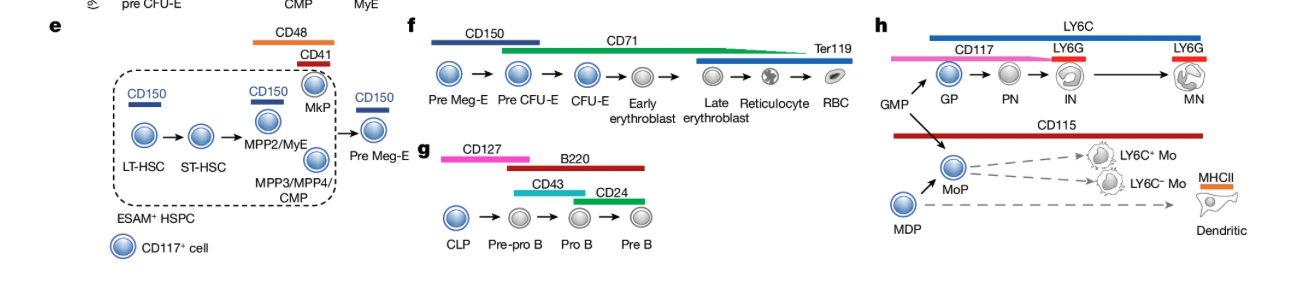

In [8]:
Image(filename='/lustre/scratch126/cellgen/team298/sm54/Data_Integration/Marker_Genes/Figures/Wuetal2024Fig1efgh.png')

In [11]:
MPC_Markers= {
    "myelopoiesis": ["KIT","LY6G6D",'LY6G6C',"CSF1R"], # CD117 is KIT; CD115 is CSF1R
    "B_lymphopoiesis.": ["IL7R","PTPRC","SPN","CD24"],
    "erythropoiesis": ["SLAMF1",'TFRC',"GYPA"], 
    "MPP2/MyE": ['SLAMF1',"CD48",],
    "MPP3/4/CMP": ["CD48",],
    "MkP": ['ITGA2B'],
    "HSC": ["SLAMF1","KIT","ESAM"]
}

# Combined Dictionary

In [3]:
combined_dict= {
'Neural progenitors' : [ 'OLIG2','NKX2-2'], 
'Glia' : ["NFIA"],
'Oligodendrocytes': ["SOX10", "SOX9", "PDGFRA", "S100B"], 
"CNS-Prog": ["SOX2"],
"CNS-Neuron": ["ELAVL3"],
"PNS-Prog": ["SOX10"],
"PNS-Neuron": ["SIX1"],
"Floorplate": ['PAX7', 'CDH7', 'TXLNB', 'CDHR3', 'PIFO', 'RRAD'],
'Mesoderm': ['PAX3','PRRX1','ZEB2'],
'Progenitors':['CDH5','PROX1','PECAM1'],
'LEC': ['TFPI','LYVE1','KDR'],
'Erythrocytes': ['HBA1','HBE1'],
'Mesoderm': ['PRRX1','ZEB2'],
'Neural Crest':['SOX10','WNT1'],
'Pia': ['S100A6','NGFR'],
'Arachnoid': ['ALDH1A2','CRABP2'],   
'Dura': ['SFRP1','DKK2'],
'Perivascular': ['LAMA1','PDGFRA'],
'Vascular endothelial': ['PECAM1','SLC2A1'],
'Arachnoid Barrier': ['SLC22A6','ABCB1','SLC22A8','CLDN11','CDH1'], 
    
'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
'PRE PRO B':['FLT3','CD19','VPREB1'], 
'PRO B':['MME','CDC45','DHFR','MKI67'], 
'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
'PRO -> PRE':['CD24','TNFRSF17'], 
'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
'B1':['CD27','SPN','CCR10'],
'PLASMA B':['JCHAIN','SDC1','CD38'],
'CYCLING_B':['MKI67'],
    
'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
'MAC_TREM2':["TREM2",	"P2RY12",],
'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5"],

"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
'MLP':['BCL11A','IL7R','IL2RG'],
'B lineage':['CD19','VPREB1','PAX5'],
'T lineage':['CD3D','BCL11B'],
'MEMP':['GATA2'],
'MEP':['KLF1','ITGA2B'],
'Ery lineage':['HBB','HBG1'],
'Myeloid lineage':['MPO','CSF1R','CEBPA'],
    
'FIBROBLAST':['PDGFRA'],
'SPLENIC FIBRO':['NKX2-5'],
'MYOFIBROBLAST':['ACTA2'],
'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
'MESOTHELIUM':['UPK3B','LRRN4'],
'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
'GLIAL CELL':['SOX10','SOX2'],
'NEURON':['TUBB2B','STMN4','ELAVL3'],
'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
'KERATINOCYTE':['KRT14','KRT5','GATA3'],
'HEPATOCYTE':['APOA1','ALB','AFP'],
'DEVELOPING NEPHRON':['PAX2'],
'EPITHELIUM':['EPCAM','CDH1','KRT19'],
'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
#'TIP EC':['VIM','PODXL','IL32','KDR'],
'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
'CYCLING':['MKI67'],
'ERY':['HBB'],
'IMMUNE':['PTPRC'],
    
"HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],
"Lymphoid": [ "CD7", "IL7R"],
"ysDC": [ "LTBR", "CLEC10A", "CD1C"],
"Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],
"Macrophage": ["CD4","CD14","C1QA"],
"TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
"Granulocyte pre.": ["MPO","CLC","GATA2"],
"Mast Cell": ["TPSAB1", "KIT"],
"MK": ["ITGA2B","ITGB3","CLEC1B"],
"Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
"Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
"Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
"Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
"Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
"Mesothelium": ["KRT19","PDPN","UPK3B"],
"Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"],

"Neuron (broad)": ["DCX", "ELAVL3","MAP2","STMN2", "RBFOX3",'TUBB2B','STMN4', 'SNAP25','BCL11B' ],
"Immature Neuron": ["INA"], # Braun et al., 2022
"Neuroblast": ["NHLH1", "NRXN3", "NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4"], # Manno et al., 2016; Braun et al., 2022 
"Glioblast":["TNC","BCAN"], # # Braun et al., 2022 
"OPC":["PDGFRA","OLIG1", "OLIG2","SOX10"], # 
"Radial Glia": ["HES2","NES", "SOX2","SOX10"],   
'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages 
"Pericyte":["FOXC2","PDGFRB", "CD248", "RGS5"], # Trevino et al., 2021 ; "CD248", "RGS5": manno et al., 2016
"LPM":["LUM", "COL1A1"], # Leptomeningial ; Trevino et al., 2021 
"Endothelial":["CLDN5","PECAM1", "KDR"], #"CLDN5","PECAM1": Trevino et al., 2021; KDR, CLDN5: Manno et al., 2016 
 "RBC":["HEMGN"], # Trevino et al., 2021; need to combine this with erythrocytes
"EPENDYMAL":["FOXJ1"], # Trevino et al., 2021 
"Neural_Progenitor": ["NEUROG1", "TFDP2", "HMGA1", "HMGB2"], # Manno et al., 2016 
'LEC': ["PROX1","FLT4", "PDPN", 'LYVE1'], # Lymphatic endothelial cell; Jafree et al., 2021 
"Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
"Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
"Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
"Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
"Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
"Mesothelium": ["KRT19","PDPN","UPK3B"],
"Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"],
    
'CD8 TRM' : ["CD3E",'CD8A', 'RUNX3', 'CD69', 'CD44'], 
"CD8_cytotoxic": ["CD8A", "GZMB", "CCL5"],
"CD8" : ["CD8A", "CD8B", "SELL"],
"Treg": ["FOXP3", "CTLA4"],
"CD4_TCM-like": ["SELL", "CCR7", "S1PR1"],
"CD4_TRM": ["CCR4", "FOXP1", "CD69"],
"CD4_Th": ["RORA", "FOXP1", "CCR4"],
"CD4_Th2": ["GATA3", "PPARG", "IL13"],
"Proliferating_TRM": ["FABP5", "MKI67"],
"CD4_Th1": ["TBX21", "STAT1"],
"CD4_Th17": ["RORC", "IL17A"],
"CD4_Th22":  ["IL21", "IL22"],
                      
"Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],
"Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
"Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
"Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
"B_lineage": ["HLA-DRA","IGLL1","CD79B","TCL1A","IGKC","MS4A1","CD19","LTB","VPREB1","PAX5"],
"ILC_prec.": ["PTPRC",'CD34','KLRB1',"CD3E","CD7",'IL7R',"KIT"],
"MK": ["ITGA2B","ITGB3","CLEC1B",'PF4', 'MYL9', 'TREML1', 'PPBP'],
'T/NK': ["CD8A",'KLRD1',"NKG7","XCL2","NCAM1"],
"Late_ERY":[ "HBZ",'GYPA', 'GYPB', 'SLC4A1'],
"Macrophage": ["CD4","CD14","C1QA","MRC1","LYVE1","SIGLEC1","CD68"],
'Monocyte_lineage':["CD52", "S100A8",   "MS4A6A",   "CD14", "CD300E","LYZ",],
'Mast':['KIT','TPSB2','CLU','CTSG','PRG2','CTSD','HPGDS','CPA3','GPNMB','VWA5A','MRGPRX2','RGS13','CMA1','MAOB','HLA-DRA',
            'HLA-DRB1','HLA-DRB5','PTPRC','TPSAB1','PRSS57','CNRIP1','GATA2'],
"HSC/MPP.": ["HLA-DRA", "CD34", "SPINK2"], 
"Pre pro-B cell": ["IGLL1","CD79B"],
"pro-B cell": ["TCL1A","IGKC","MS4A1","CD19"],
"pre-B cell/B": ["LTB"], 
"ILC pre.":["LTB","KLRB1","CD3E","PTPRC","CD7","IL32"],
"Early L/TL": ["CD8A"],
"NK": ["KLRD1","NKG7","XCL2","NCAM1"],
"Neut-my pro.": ["MPO","PLAC8","LYZ"], 
"pDC pre.": ["IL3RA",'CLEC9A'],# PLAC8 is not specific 
"DC pre.": ["S100A9",'CD1C'],
"DC1": ['CLEC9A'], 
"DC2" : ["CD1C"], 
"Mono pre.": ['S100A9'], 
"Monocyte": ['CCL4','CD14'], 
"Mono-mac": ['FCGR3A','CD4','C1QA'], 
"Kuppfer cell" : ['VCAM1'], 
"VCAM1+ EI mac": ['GYPA'], 
"MEMP": ['SERPINB1'], 
"Mast": ['TPSAB1','KIT'],
"MK": ['PF4','ITGA2B'], 
"Early ERY": ['GATA1','KLF1'], 
"Mid ERY": ['ALAS2','HBA1'], 
"Late ERY": ['BPGM'], 
"Endo": ['ESAM'], 
"Fibro":['ECM1'], 
"Hepatocyte": ['APOA1'],
"Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],

"Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
"Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
"Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
"ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
"HSC": ["CD34","SPINK2","CRHBP"],
"CMP": ["MPO","CTSG","FLT3"],
"GMP": ["ELANE","MPO","PRTN3"],
"MEMP": ["GATA1","GATA2","ITGA2B","FCER1A"], # FCER1A, GATA1 and GATA2 liver 
"Neut_myeloid_pro.":["SERPINB1","MPO","LYZ"],
"ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
"ILC_precursor": ["LST1","HPN","SCN1B"],
"NK": ['GNLY','NKG7','XCL2'],
"CD16+ NK": ["FCGR3A","GNLY","NKG7"],
"CD16- NK": ["CD160","GNLY","NKG7"],
'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
"ILC": ["S100A13",'TLE1','AREG'],
'ILC1': ['CXCR3','CD3D','IKZF3'],
'ILC2': ['GATA3','KLRG1','HPGDS'], 
'ILC3': ['IL4I1','RORC','KIT'],
 "MNP": ["HLA-DPA1","HLA-DQA1",'FGL2'],
"Mast": ["TPSAB1","TPSB2",'CPA3'],
"ERY/MK":["PTPRC",'EPCAM','GYPA','GYPB','ITGA2B','ITGB3'],
"EC": ['CDH5','KDR','ANPEP'], 
"Gran/mast/DC": ["MSR1","KIT", 'IL3RA','IL5RA','HLA-DRA','HAVCR2','CLEC9A'], 
"Monocytes": ["CD1C",'CLEC4C','CD14','CD52','CD34','CD96'], 
"Neurtrophil": ["ITGB2",'SELL','ITGAM'], 
"B lineage": ["CEACAM8",'CD99','CD79A','MME','MS4A1','TNFRSF13C'],
"CD4T/CD56 NK": ['CD3E','KLRB1'], 
    
 'primordial germ cell': ['NANOG', 'NANOS3', 'POU5F1', 'DPPA3', 'DND1'],
 'sclerotome': ['PAX1', 'PAX9', 'CNMD'],
 'lateral plate mesoderm': ['PRRX1', 'PRRX2', 'LHX9','MSX1','MSX2','TBX2', 'TBX3', 'PITX1'],
 'radial glia': ['SOX2', 'NES', 'MKI67'],
 'radial glia cortical': ['SOX2', 'NES', 'MKI67', 'EMX2', 'PAX6', 'FOXG1'],
 'radial glia diencephalon': ['SOX2', 'NES', 'MKI67', 'PAX6', 'WNT2B'],
 'radial glia midbrain': ['SOX2', 'NES', 'MKI67', 'EN1', 'OTX2'],
 'radial glia mid-hindbrain boundary': ['SOX2','NES', 'MKI67','FGF18','SPRY1','SPRY2'],
 'radial glia hindbrain': ['SOX2', 'NES', 'MKI67', 'PAX6'],
 'glial progenitor': ['TNC', 'BCAN'],
 'NEUROG1+ neural progenitor': ['NEUROG1'],
 'NEUROG1+ neural progenitor midbrain': ['NEUROG1', 'OTX2'],
 'intermediate neural progenitor': ['PPP1R17', 'EOMES'],
 'intermediate neural progenitor cortical': ['PPP1R17','EOMES','EMX2','FOXG1'],
 'pA1 neural progenitor': ['OLIG3', 'ATOH1'],
 'pA2 neural progenitor': ['OLIG3', 'NEUROG1'],
 'pA3-4 neural progenitor': ['OLIG3', 'PTF1A'],
 'DA1 neuron': ['LHX2', 'LHX9'],
 'DA3 neuron': ['LBX1', 'TLX3', 'LMX1B'],
 'DB1 neuron': ['LHX1', 'LHX5', 'PAX2', 'LBX1'],
 'DL1 neuron': ['BARHL1', 'BARHL2'],
 'DL2 neuron': ['TLX3'],
 'DL3 neuron': ['OTP'],
 'DL5 neuron': ['LMX1B', 'ASCL1'],
 'DL6 neuron': ['DMRT3'],
 'p2 neural progenitor': ['FOXN4', 'NKX6-1', 'VSX1'],
 'pMNv neural progenitor': ['NKX2-2', 'NKX6-1'],
 'V0 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EVX1', 'EVX2'],
 'V1 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EN1'],
 'V2A-B interneuron': ['LHX3', 'VSX2', 'SOX14', 'GATA2', 'GATA3'],
 'V3 interneuron': ['SIM1', 'NKX2-2'],
 'motor neuron': ['MNX1', 'ISL1'],
 'inhibitory neuron cortical': ['GAD1','GAD2','ADARB2','RELN','SNCG','LAMP5',  'FOXG1'],
 'inhibitory neuron midbrain': ['SGK2', 'PCOLCE2', 'OTX2'],
 'inhibitory neuron hindbrain': ['GAD1','GAD2', 'ADARB2','RELN','SNCG', 'LAMP5', 'GBX2'],
 'excitatory neuron': ['SLC17A6','SLC17A7','LINC00507','FEZF2', 'THEMIS', 'EMX1'],
 'excitatory neuron cortical': ['SATB2','BCL11B','SLC17A7', 'TBR1', 'EMX2', 'FOXG1'],
 'excitatory neuron midbrain': ['SLC17A6', 'SLC17A7','LINC00507','FEZF2', 'THEMIS', 'EMX1','OTX2'],
 'excitatory neuron hindbrain': ['SLC17A6','SLC17A7','LINC00507','FEZF2','THEMIS','EMX1','PAX6'],
 'ELAVL4+ neuron': ['ELAVL4', 'INA', 'TUBB3'],
 'ELAVL4+ neuron cortical': ['ELAVL4', 'INA', 'TUBB3', 'FOXG1'],
 'ELAVL4+ neuron midbrain': ['ELAVL4', 'INA', 'TUBB3', 'OTX2'],
 'dopaminergic neuron': ['TH', 'DDC', 'SLC6A3', 'KCNJ6', 'SLC18A2', 'CALB1'],
 'dopaminergic neuron midbrain': ['TH','DDC','SLC6A3','KCNJ6','SLC18A2','CALB1','OTX2'],
 'dopaminergic neuron hindbrain': ['TH','DDC','SLC6A3','KCNJ6','SLC18A2','CALB1','PAX6'],
 'serotenergic neuron': ['TPH2', 'SLC6A4', 'FEV', 'GATA3', 'CHGB'],
 'sympathetic neuron': ['PHOX2B', 'DBH', 'TLX2', 'CHGA'],
 'enteric neuron': ['VIP'],
 'proprioceptive neuron': ['HMX1', 'HMX2'],
 'floor plate': ['SHH', 'FOXA2'],
 'roof plate': ['LMX1A', 'WNT1', 'GDF7', 'WNT3A'],
 'ependymal glia': ['FOXJ1'],
 'ependymal glia midbrain': ['FOXJ1', 'OTX2'],
 'oligodendrocyte precursor': ['SOX2', 'EGFR', 'OLIG1', 'OLIG2', 'DLL3'],
 'oligodendrocyte precursor cortical': ['SOX2',
  'EGFR', 'OLIG1', 'OLIG2','DLL3','FOXG1','EMX2','PAX6'],
 'oligodendrocyte precursor midbrain': ['SOX2', 'EGFR','OLIG1','OLIG2','DLL3','OTX2'],
 'oligodendrocyte precursor hindbrain': ['SOX2','EGFR','OLIG1','OLIG2','DLL3','PAX6'],
 'schwann cell precursor': ['MPZ', 'SOX10', 'PLP1', 'FOXD3'],
 'retinal pigment epithelium': ['MITF','PAX2','DCT','CCK','ALDH1A3','TRPM3','POMC','HSD17B2'],
 'retinal neural progenitors': ['VSX2','OPTC','CLDN1','RAX','SIX3','PAX6','DAPL1','CCL2','ALDH1A1','SIX6'],
    
 'auditory vesicle neural progenitors': ['OC90','BRICD5','S100A1','PLPP2','WFDC2','LMX1A','GATA3', 'DLX5'],
 'melanocyte': ['CRYAB', 'TYRP1', 'PMEL', 'TYR', 'DCT', 'MLANA', 'MITF'],
 'periderm': ['UPK2','GABRP', 'KRT18','KRT8','ELF3','IL36RN','MUC16', 'VTCN1'],
 'keratinocyte': ['KRT5', 'KRT15', 'KRT18', 'KRT19', 'RASSF6', 'RASSF7'],
 'lower genital keratinocyte': ['TP63', 'FOXA1'],
 'dermal fibroblast precursor': ['EN1', 'SIM1', 'PAX3', 'OSR1', 'TWIST2'],
 'dermal fibroblast': ['WNT2', 'HOXC4','HOXC5','FRZB','SLC6A13','SLC1A3','SLC6A1','EPHA7','CYP1B1'],
 'atrial cardiomyocyte': ['NPPA', 'MYL7', 'MYL4'],
 'ventricular cardiomyocyte': ['MYH7', 'MYL2', 'FHL2'],
 'atrioventricular pacemaker': ['MSX2', 'TBX3', 'CACNA1D'],
 'mesothelial epicardium': ['ALDH1A2', 'LRP2', 'ITLN1', 'TBX18'],
 'epicardial derived cell': ['TBX18'],
 'vascular smooth muscle': ['TAGLN', 'MYL9', 'FOXC2', 'PRDM6', 'TBX1'],
 'early endothelium': ['S100A10', 'PODXL', 'ITM2A', 'SLC2A1'],
 'early lymphatic endothelium': ['TFF3', 'NTS', 'PROX1'],
 'arterial endothelium': ['ALDH1A1','IL33','GJA5','DKK2','UNC5B','DLL4','PRND','GPIHBP1', 'CXCR4'],
    
 'haeamatopoietic stem and progenitor cell': ['MLLT3', 'HOPX', 'SPINK2'],
 'myeloid progenitor': ['CD34', 'PRSS57', 'AZU1', 'CTSG', 'PRTN3'],
 'monocyte': ['HLA-DRA', 'LYZ', 'FCGR3A'],
 'monocyte-DC': ['HLA-DRA','LYZ', 'FCGR3A','CLEC9A','BTLA','BATF3','CLEC10A','CD1C','CSF3R','S100A12'],
 'macrophage': ['CD4', 'CD14', 'C1QA'],
 'microglia': ['TREM2', 'CX3CR1', 'P2RY12'],
 'DC2': ['CLEC10A', 'CD1C'],
 'DC3': ['CSF3R', 'S100A12'],
 'B cell progenitor': ['SPINK2','IL7R','DNTT', 'VPREB1','RAG1', 'CD19','IGHM','IGHD','MS4A1'],
 'megakaryocyte erythroid mast progenitor': ['GATA1','GATA2','TESPA1', 'CTNNBL1','CD34'],
 'mast cell': ['TPSAB1', 'KIT'],
 'megakaryocyte': ['PF4', 'MYL9', 'TREML1', 'PPBP'],
 'early erythroid': ['HBE1', 'HBZ'],
 'mid-late erythroid': ['GATA1', 'KLF1', 'GYPA', 'HBA1'],
    
 'dental pulp cell': ['SOX9', 'SCUBE1'],
 'odontoblast precursor': ['DKK1', 'RUNX2', 'PDPN', 'NOTUM', 'ETV4', 'FRMD5'],
 'intevertebral disc': ['NDUFA4L2'],
 'meningeal fibroblast': ['ALDH1A2', 'CLDN11', 'ACTG2'],
 'limb mesenchyme': ['ALX4', 'IRX3', 'HIC1', 'GSC', 'OBSCN'],
 'limb fibroblast': ['TBX5','TBX15','TBX18','TBX3','PDGFRA','HIC1','SHOX2', 'MEOX2'],
 'limb chondrocyte precursor': ['SOX6','SOX9','SHOX','SHOX2','TBX4','PITX1','HOXA10','CNMD'],
 'limb digit chondrocyte precursor': ['TBX5','HOXA13','HOXD13','SOX9','HAND2','SALL1'],
 'chondrocyte precursor': ['GDF5', 'PRDM16'],
 'osteoblast precursor': ['RUNX2', 'DLX5'],
 'myofibroblast': ['PDGFRA', 'OBSCN', 'NEAT1'],
 'fibroblast': ['GDF10', 'PDGFRA', 'UNC5C', 'MECOM'],
 'skeletal muscle progenitor': ['PAX3', 'MYOD1','TNNT1','ACTC1','PAX7', 'MSC'],
 'skeletal myoblast': ['PAX7', 'MYF5', 'TTN'],
 'hypaxial skeletal myoblast': ['PAX7', 'LBX1', 'MYOD1'],
 'skeletal myocyte': ['MYOG', 'MYH3'],
 'perimysium': ['HLX'],
 'tendon progenitor': ['OSR2', 'MEOX2', 'SCX'],
 'intermediate mesoderm gonadomesenephros': ['OSR1', 'WT1', 'PAX8', 'LBX2'],
 'coelomic gonadal epithelium': ['UPK3B', 'KRT19', 'LRRN4', 'GATA6'],
 'wolffian duct': ['CALB1', 'WNT9B'],
 'kidney podocyte': ['NPHS1', 'NPHS2', 'WT1'],
 'renal fibroblast': ['CDH9', 'GATA5'],
 'hepatic stellate cell': ['HGF'],
 'hepatocyte': ['APOA1', 'AFP'],
 'pancreatic progenitor': ['PDX1'],
 'pharyngeal arch 1 neural crest': ['DLX1', 'DLX2', 'DLX3','DLX4','DLX5','DLX6'],
 'pharyngeal arch 2 neural crest': ['DLX1',  'DLX2',  'DLX3', 'DLX4','DLX5','DLX6','HOXA2','HOXB2'],
 'pharyngeal epithelium': ['ISL1', 'NKX2-3', 'NKX2-5', 'FOXP2'],
 'oesophageal epithelium': ['SOX2', 'KLF5', 'DCDC2', 'EPS8L2', 'FOXA1'],
 'stomach epithelium': ['KLF5','ONECUT2','FOXA1','AGR3','FXYD3','KLF5','DCDC2','STARD10','FOXA1'],
 'intestinal epithelium': ['CDX2'],'lung epithelium': ['NKX2-1', 'TPPP3', 'LRRC36', 'CPM', 'UGT2B7'], 
    
    
 "HSC_Signature": ["RUNX1", "MLLT3","HOXA9","MECOM","HLF","SPINK2"],
    "HSC_Enriched": ["MYB","GFI1","STAT5A",'ZBTB16','HOPX','GATA2',
                     'GBP4','ITGA2B','KCNK17','SVOPL','C2orf88','SELP',
                     'CD82','ITGA4','GP9','TMEM163','RAB27B','SMIM24',
                     'GMPR','PDLIM1','ALDH1A1','NRGN','CCDC173','CXCL3',
                     'CYTL1','PRSS57','ANGPT1'],
    'HSC_shared_Endo': ["CD34","PECAM1",'CDH5','ECSCR.1','CALCRL',
                       'PROCR','ESAM','TIE1','EMCN'], 
    "Immature": ['CDH5', 'MEIS2', 'IGFBP2', 'HOXB9'],
     "Mature": ['PROM1', 'HLA-DRA', 'HEMGN', 'MSI2'],
    'ProE/BasoE' : ['FTH1','TPT1','EEF1A1',],
    
'Early-PolyE' : ['ACTB','CFL1',],
    
'Late-PolyE' : ['ARL6IP1','SKP1','TOP1','GYPA','HBD','GYPB'],
    
'Early-OrthoE' : ['SLC25A37','ARL4A','HBD','BNIP3L',
'TMCC2','XPO7','BSG','IFIT1B','ALAS2','LPIN2',],
    
'Late_OrthoE' : ['HBA2','HBA1','UBB','MKRN1'], 
 

}
